In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import iqr
#from libsvm.svmutil import *

In [2]:
train_df = pd.read_csv('kaggle/html2023-spring-final-project/train.csv')
train_df = train_df.iloc[:, list(train_df.dtypes == float)]

In [3]:
train_x_o = train_df.iloc[:, 1:]
train_y = train_df.iloc[:, 0]

# Scatter plots: original data

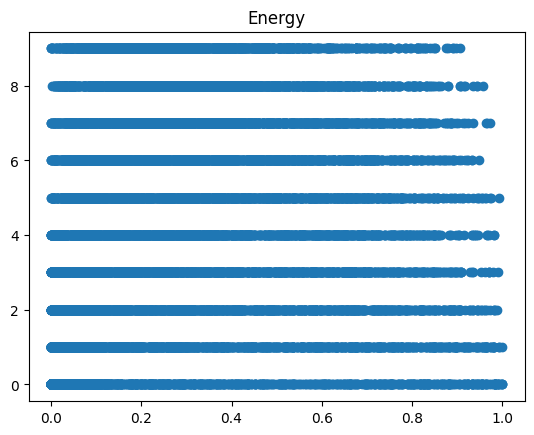

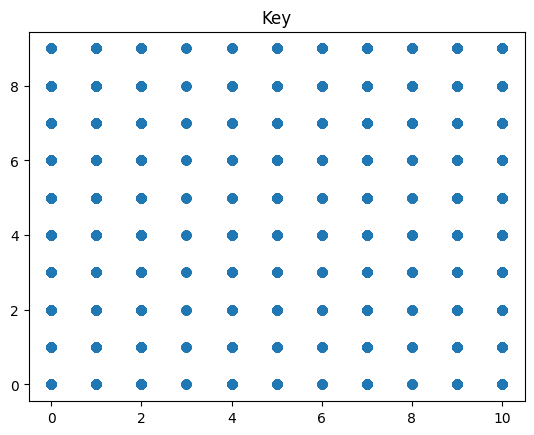

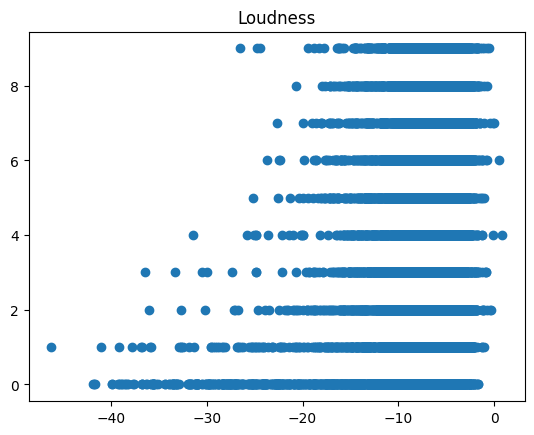

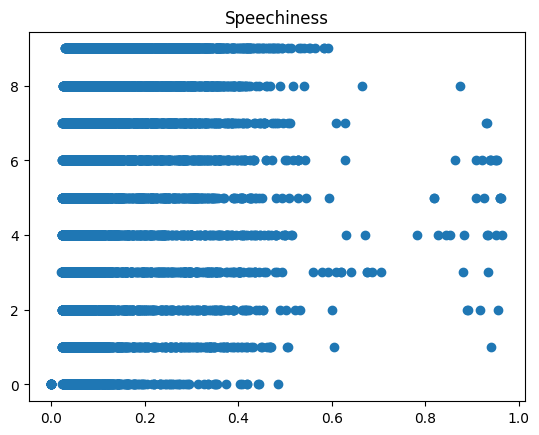

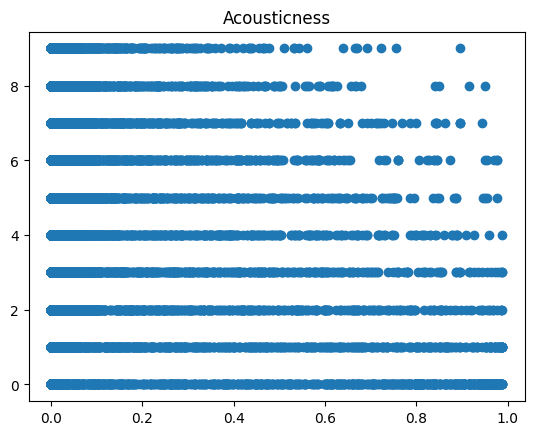

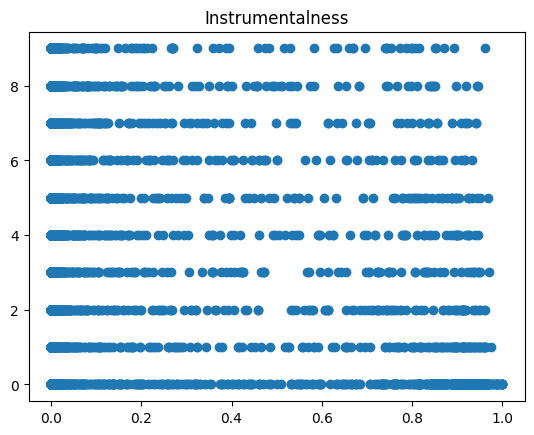

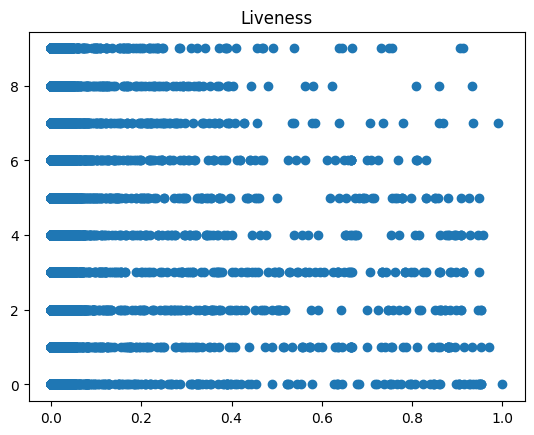

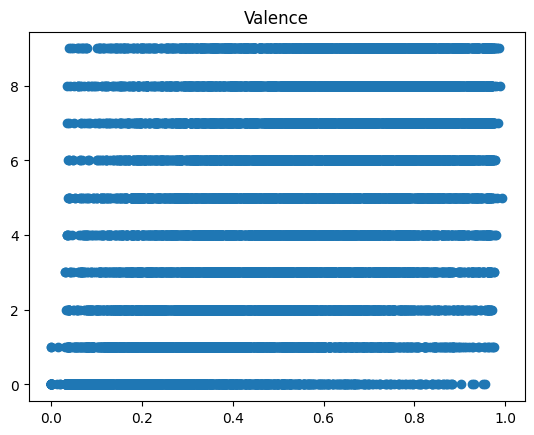

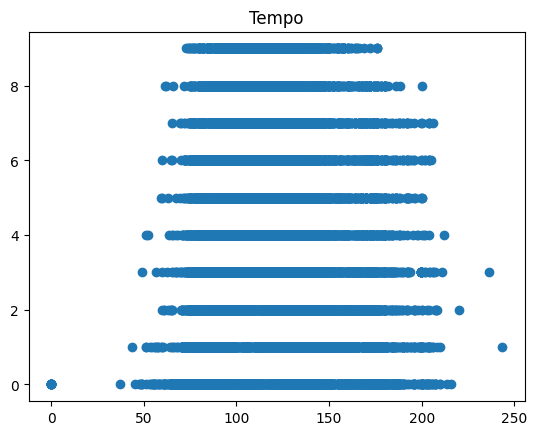

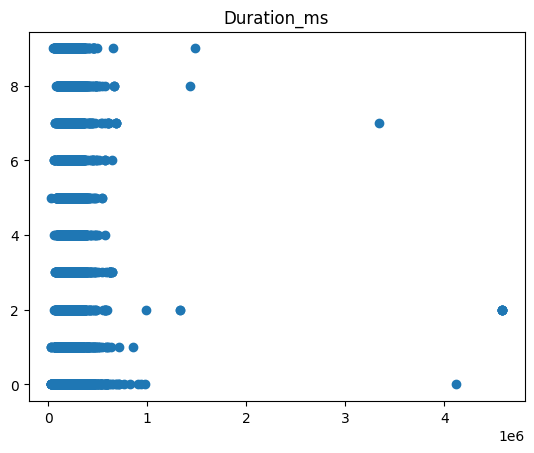

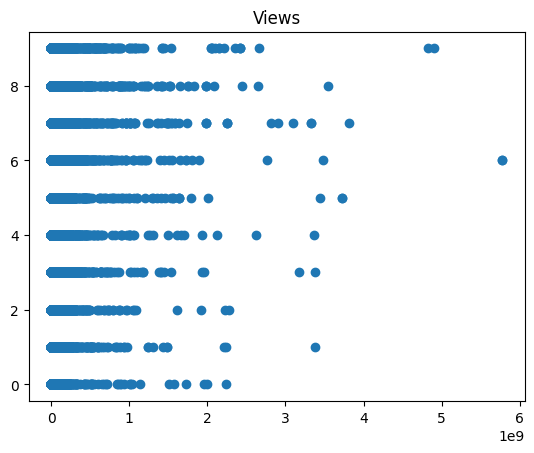

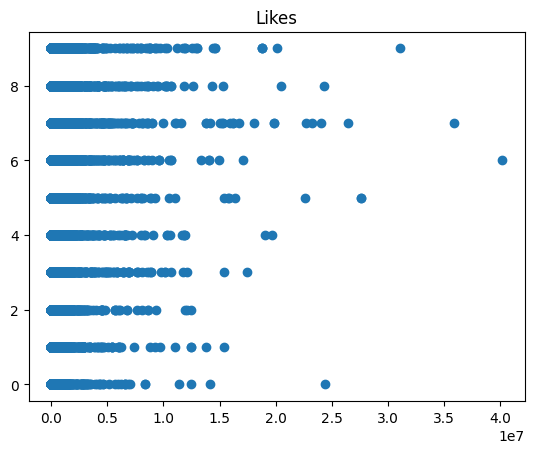

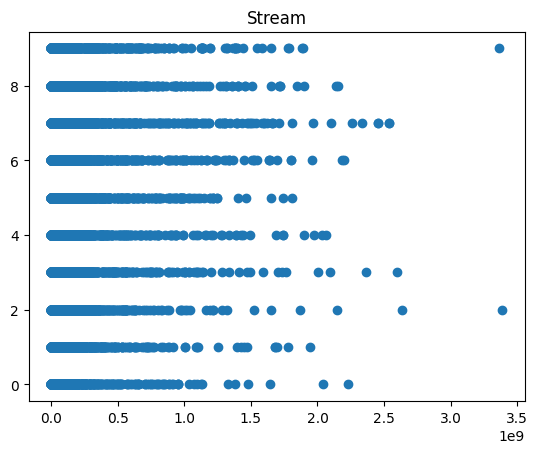

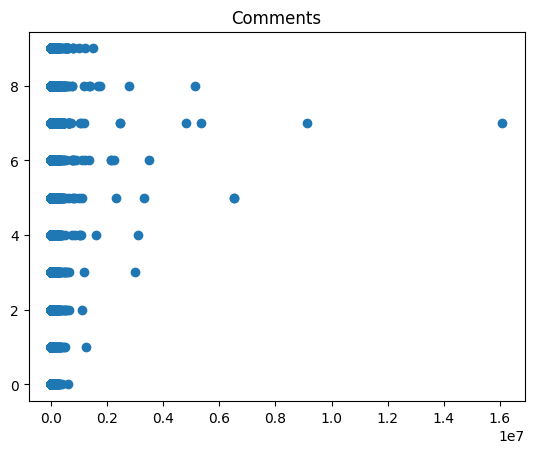

In [4]:
for i in range(train_x_o.shape[1]):
    plt.scatter(train_x_o.iloc[:, i], train_y)
    plt.title(train_df.columns[i + 1])
    plt.show()

# Use IQR to scale data for knn

In [6]:
iqrs = train_x_o.apply(lambda x: np.nanquantile(x, 0.75) - np.nanquantile(x, 0.25))
iqrs

Energy              3.720438e-01
Key                 6.000000e+00
Loudness            3.735000e+00
Speechiness         6.990000e-02
Acousticness        1.024053e-01
Instrumentalness    3.920000e-04
Liveness            1.165127e-02
Valence             3.860000e-01
Tempo               4.294925e+01
Duration_ms         7.020600e+04
Views               6.406820e+07
Likes               4.851995e+05
Stream              1.093674e+08
Comments            1.308500e+04
dtype: float64

In [8]:
train_x_scale = train_x_o / iqrs
knn = KNNImputer(n_neighbors=5)
train_x_scale = knn.fit_transform(train_x_scale)
train_x = train_x_scale * iqrs.to_numpy()
# Key should be int
for i in range(train_x.shape[0]):
    train_x[i][1] = round(train_x[i][1])

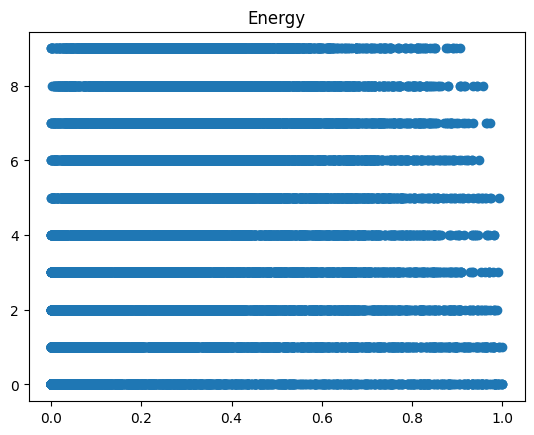

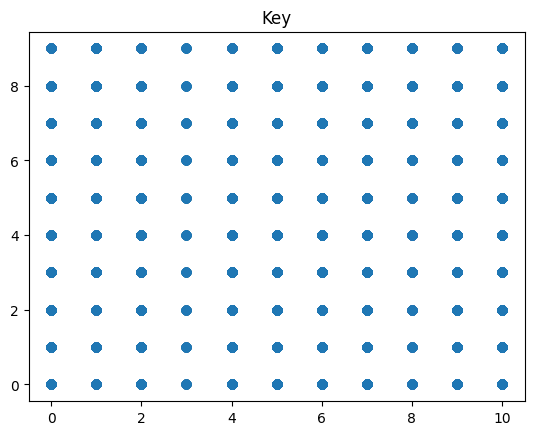

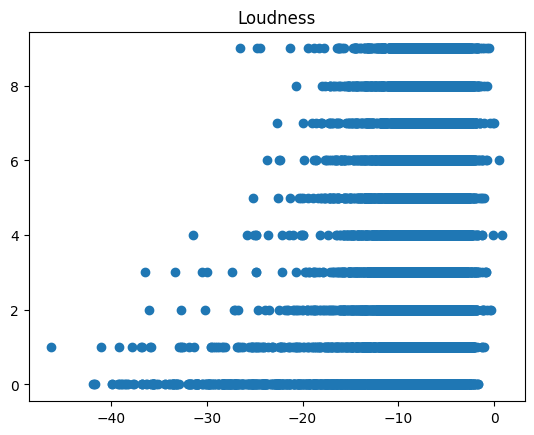

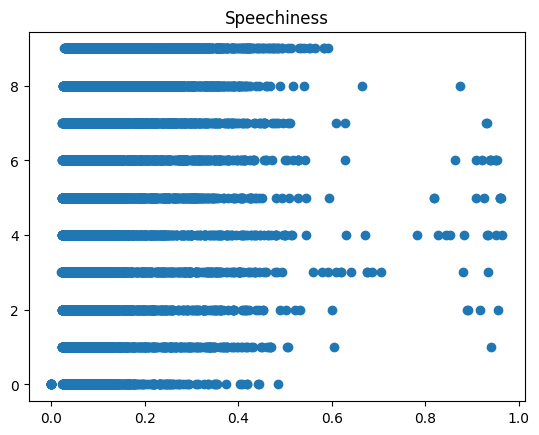

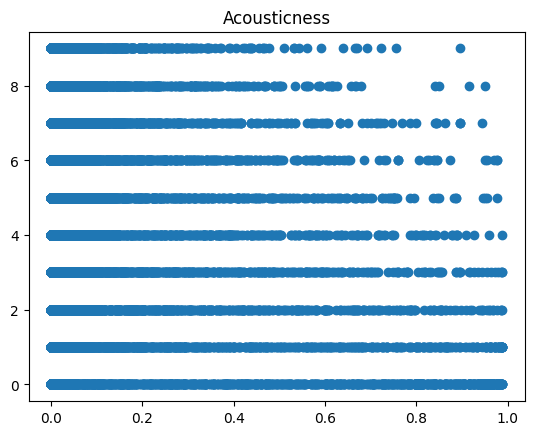

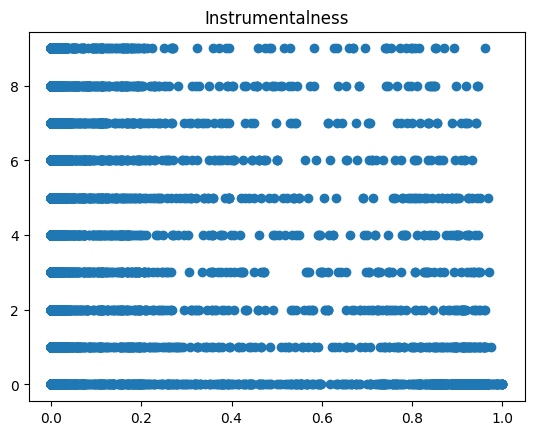

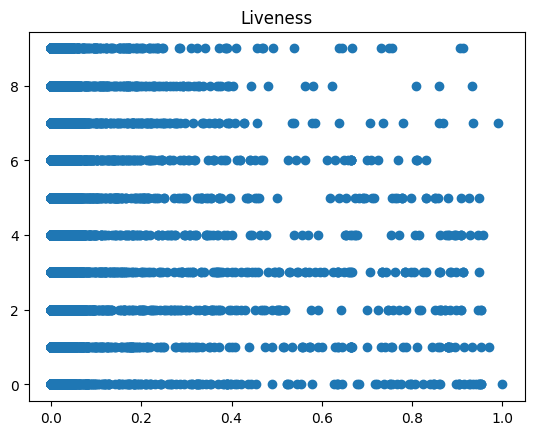

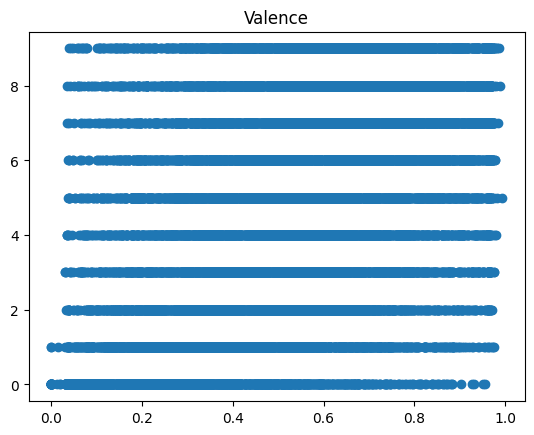

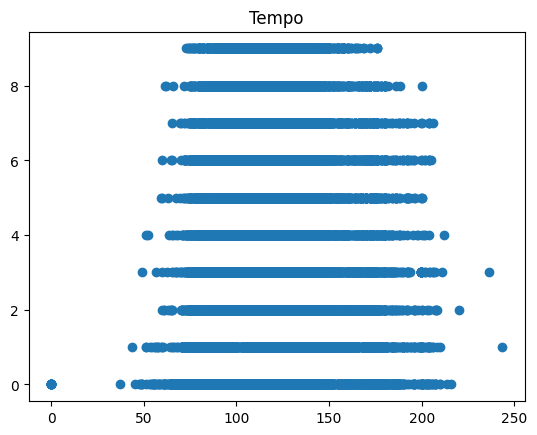

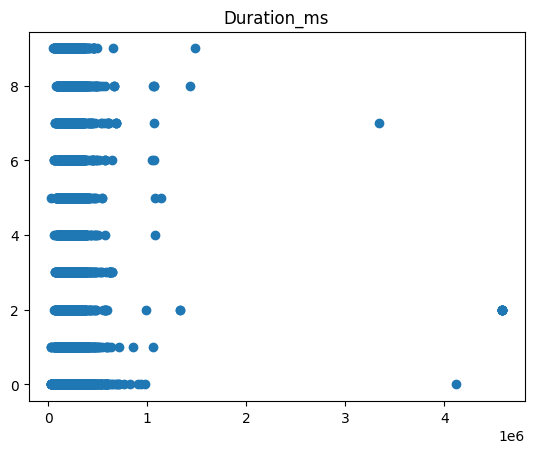

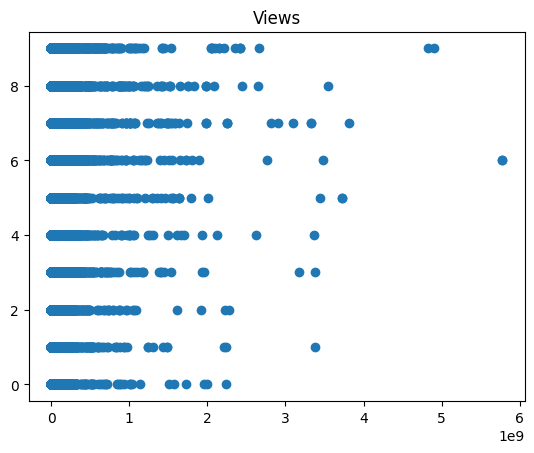

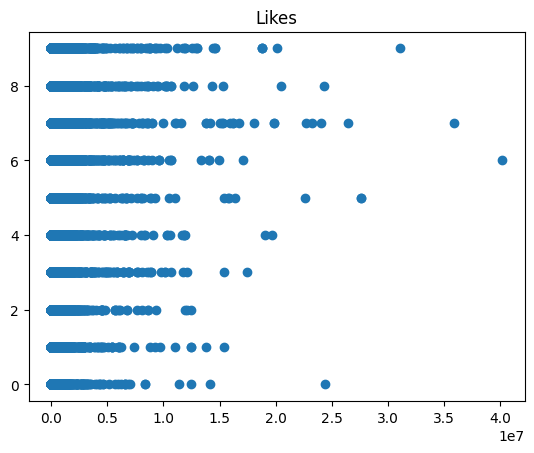

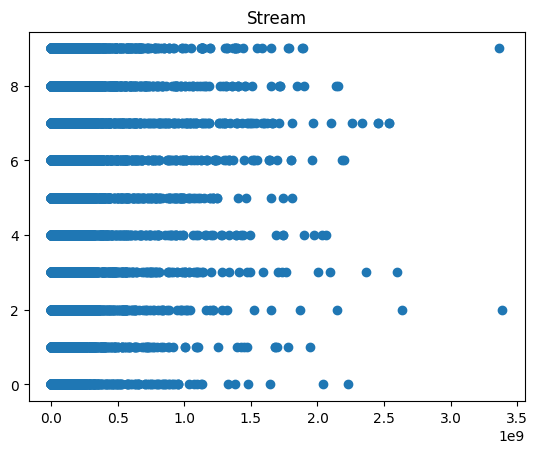

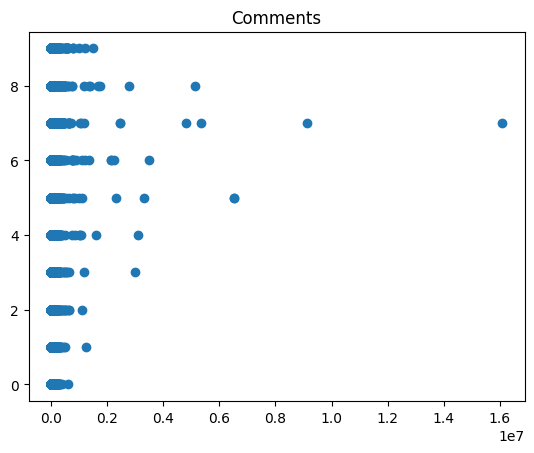

In [9]:
for i in range(train_x.shape[1]):
    plt.scatter([x[i] for x in train_x], train_y)
    plt.title(train_df.columns[i + 1])
    plt.show()

# Linear regression

In [10]:
lm = make_pipeline(RobustScaler(), LinearRegression())
cross_val_score(
    lm,
    train_x,
    train_y,
    cv=5,
    scoring="neg_mean_absolute_error"
)

array([-1.94971413, -2.06895792, -2.05473444, -2.04662401, -2.0575902 ])

In [11]:
lm.fit(train_x, train_y)
lm.score(train_x, train_y)

0.292252734405433

In [12]:
mean_absolute_error(train_y, lm.predict(train_x))

2.0110885972909283

# Polynomial transform

In [13]:
for i in range(2, 4):
    poly = PolynomialFeatures(i)
    train_x_p = poly.fit_transform(train_x)
    lm = make_pipeline(RobustScaler(), LinearRegression())
    lm.fit(train_x_p, train_y)
    print("R2: ", lm.score(train_x_p, train_y))
    print("MAE: ", mean_absolute_error(train_y, lm.predict(train_x_p)))

R2:  0.3884230940777432
MAE:  1.8435964885127958
R2:  0.4412913957946494
MAE:  1.735894825226068


In [15]:
poly = PolynomialFeatures(3)
train_x_3 = poly.fit_transform(train_x)
lm = make_pipeline(RobustScaler(), LinearRegression())
cross_val_score(
    lm,
    train_x_3,
    train_y,
    cv=5,
    scoring="neg_mean_absolute_error"
)

array([-1.81491693, -1.89284379, -1.93302481, -2.94062151, -2.29351005])

# Lasso and Ridge regression

In [16]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=600))
cross_val_score(
    lasso,
    train_x_3,
    train_y,
    cv=5,
    scoring="neg_mean_absolute_error"
)

c:\Users\sciph\anaconda3\envs\machine-learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.161e+02, tolerance: 1.123e+01
  model = cd_fast.enet_coordinate_descent(


array([-2.32715908, -2.47382803, -2.39573924, -2.38478895, -2.4455328 ])

In [17]:
lasso.fit(train_x_3, train_y)
lasso.score(train_x_3, train_y)

0.07285013909035065

In [18]:
mean_absolute_error(train_y, lasso.predict(train_x_p))

2.3736007745782395

In [19]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha=1000))
cross_val_score(
    ridge,
    train_x_3,
    train_y,
    cv=5,
    scoring="neg_mean_absolute_error"
)

c:\Users\sciph\anaconda3\envs\machine-learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.04534e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sciph\anaconda3\envs\machine-learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.66159e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sciph\anaconda3\envs\machine-learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.72108e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sciph\anaconda3\envs\machine-learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.43996e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrit

array([-1.85408079, -1.98757026, -2.00875605, -2.70231382, -2.25932541])

In [20]:
ridge.fit(train_x_3, train_y)
ridge.score(train_x_3, train_y)

c:\Users\sciph\anaconda3\envs\machine-learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.60358e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.4062113548889279

In [21]:
mean_absolute_error(train_y, ridge.predict(train_x_p))

1.8110529155842467

# Gaussian kernel SVM

In [22]:
svm = make_pipeline(RobustScaler(), SVC(C=10000, gamma=10))
cross_val_score(
        svm,
        train_x,
        train_y,
        cv=5,
        scoring="neg_mean_absolute_error"
    )

array([-2.61153174, -3.48543972, -2.61124054, -3.47524752, -2.58415842])

In [23]:
svm.fit(train_x, train_y)
mean_absolute_error(train_y, svm.predict(train_x))

0.0